In [0]:
print('Lets Strat')

Lets Strat


In [0]:
import pandas as pd

In [0]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/mother sentiment challange/data/dataset/train.csv')


In [0]:
tdf=pd.read_csv('/content/drive/My Drive/Colab Notebooks/mother sentiment challange/data/dataset/test.csv')

In [0]:
df.head()

,id,original_text,lang,retweet_count,original_author,sentiment_class
0,1.245025e+18,pic.twitter.com/8ksnW4qDyV Https://www.instagr...,enp,0,BeenXXPired,0
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1


In [0]:
# drop nan values
df=df.dropna()

In [0]:
## Get the Independent Features

X=df.drop('sentiment_class',axis=1)
X.head()

,id,original_text,lang,retweet_count,original_author
0,1.245025e+18,pic.twitter.com/8ksnW4qDyV Https://www.instagr...,enp,0,BeenXXPired
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794


In [0]:
## Get the Dependent features
y=df['sentiment_class']
y1=df['lang']
# for i in range(len(y1)):


In [0]:

X.shape

(3227, 5)

In [0]:
y.shape


(3227,)

In [0]:
import tensorflow as tf
tf.__version__


'2.2.0'

In [0]:

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [0]:
### Vocabulary size
voc_size=5000

In [0]:
X.shape,tdf.shape

((3227, 5), (1387, 5))

In [0]:
type(X)

pandas.core.frame.DataFrame

In [0]:

messages1=X.copy()



In [0]:
messages=messages1.append(tdf)

messages.reset_index(inplace=True)
print(len(messages))


4614


In [0]:
messages['original_text'][3227] #1st test data


'3. Yeah, I once cooked potatoes when I was 3 years old, and by that I mean I threw a bag of spuds into the toilet. " Happy mothers day , I made breakfast!" 66. That time I thought I was cool by drawing the naked lady dachshund on the overhead projector in psychology class. 8'

In [0]:
import nltk
import re
from nltk.corpus import stopwords

In [0]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('(\w+:\/{2}\s*[\d\w-]+(\.\s*[\d\w-]+)*(?:(?:\/[^\s/]*))*(\s*\?[\w]*=*[\w]*)*)*([\w]*[0-9]+(\w)*)', ' ', messages['original_text'][i])
    review = re.sub('pic.twitter.com/[\w]*', ' ', review)
    review = re.sub('xx*', ' ', review)
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [0]:
corpus[681]

'happi mother day mothersday happymothersday motherday mom mommi happymom motherhood al graphi media graphic'

In [0]:

onehot_repr=[one_hot(words,voc_size)for words in corpus] 
# onehot_repr

In [0]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 3112 3135 3291]
 [1281  622 1417 ...  347 4946 2319]
 [ 270  672 2369 ... 4588 4227 4378]
 ...
 [3133 1803  751 ...  735 4024  478]
 [2201 1753 3494 ... 1806  301 4675]
 [1264 3262 1669 ... 1281 4233 4024]]


In [0]:
embedded_docs[0]


array([   0,    0,    0,    0, 1132, 4024, 1017, 4455,  296, 3485, 2897,
       4682, 4455, 1803, 3681,  291,  419, 3112, 3135, 3291], dtype=int32)

In [0]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional

## Creating model
embedding_vector_features=250
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
# model.add(Dropout(0.3))
model.add(LSTM(250))
# model.add(Dropout(0.3))
# model.add(Bidirectional(LSTM(100)))
# model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 250)           1250000   
_________________________________________________________________
lstm (LSTM)                  (None, 250)               501000    
_________________________________________________________________
dense (Dense)                (None, 3)                 753       
Total params: 1,751,753
Trainable params: 1,751,753
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
len(embedded_docs),y.shape

(4614, (3227,))

In [0]:
import numpy as np
embedded_docs_test=embedded_docs[3227:]
embedded_docs_train=embedded_docs[:3227]
print(len(embedded_docs_test))
print(len(embedded_docs_train))
X_unknown=np.array(embedded_docs_test)
X_final=np.array(embedded_docs_train)


1387
3227


In [0]:
y_final =np.array(df['sentiment_class'])
len(y_final)
from collections import Counter
print(Counter(y_final))
print(len(X_final))
X_final.shape

Counter({0: 1693, -1: 769, 1: 765})
3227


(3227, 20)

In [0]:

# l=len(y_final)
# a=0
# for i in range(l):
#   if(int(y_final[i])==0):
#     X_final=np.delete(X_final, i,0)
#     y_final=np.delete(y_final, i)
#     a=a+1
#     if(a==100):
#       break
# print(Counter(y_final))
# print(len(X_final))

In [0]:
print(len(y_final))

3227


In [0]:
from keras.utils import to_categorical
from collections import Counter

y_final=([int(entry)+1 for entry in y_final])

print(Counter(y_final))

y_final=to_categorical(y_final)
print(y_final[110])

Counter({1: 1693, 0: 769, 2: 765})
[1. 0. 0.]


Using TensorFlow backend.


In [0]:
X_final.shape,y_final.shape
# type(X_final)

((3227, 20), (3227, 3))

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [0]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64)
y_pred=(model.predict_classes(X_test))
from sklearn.metrics import accuracy_score
accuracy_score(y_test,to_categorical(y_pred))

Epoch 1/20
34/34 [==============================] - 1s 44ms/step - loss: 1.0404 - accuracy: 0.5222 - val_loss: 1.0306 - val_accuracy: 0.5117
Epoch 2/20
34/34 [==============================] - 1s 28ms/step - loss: 0.9627 - accuracy: 0.5402 - val_loss: 1.0688 - val_accuracy: 0.4667
Epoch 3/20
34/34 [==============================] - 1s 27ms/step - loss: 0.7569 - accuracy: 0.6901 - val_loss: 1.2285 - val_accuracy: 0.4601
Epoch 4/20
34/34 [==============================] - 1s 27ms/step - loss: 0.4766 - accuracy: 0.8238 - val_loss: 1.4894 - val_accuracy: 0.4131
Epoch 5/20
34/34 [==============================] - 1s 28ms/step - loss: 0.2763 - accuracy: 0.9084 - val_loss: 1.8493 - val_accuracy: 0.3906
Epoch 6/20
34/34 [==============================] - 1s 28ms/step - loss: 0.1672 - accuracy: 0.9413 - val_loss: 2.3359 - val_accuracy: 0.3878
Epoch 7/20
34/34 [==============================] - 1s 27ms/step - loss: 0.1142 - accuracy: 0.9681 - val_loss: 2.6358 - val_accuracy: 0.3878
Epoch 8/20
34

0.40657276995305164

In [0]:
y_pred=(model.predict_classes(X_test))
# to_categorical(y_pred)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,to_categorical(y_pred))

0.40657276995305164

In [0]:
print(history.history['loss'])
print(history.history['accuracy'])
print(history.history['val_loss'])
print(history.history['val_accuracy'])

[1.0403608083724976, 0.9626645445823669, 0.7568731307983398, 0.47655200958251953, 0.276324599981308, 0.1672147959470749, 0.11423604935407639, 0.06976431608200073, 0.05967698246240616, 0.04146566241979599, 0.03348005935549736, 0.029145654290914536, 0.02126241847872734, 0.01986510679125786, 0.026132160797715187, 0.022375525906682014, 0.016699843108654022, 0.02577441930770874, 0.03477784991264343, 0.023381458595395088]
[0.522201657295227, 0.5402405261993408, 0.6901017427444458, 0.8237742781639099, 0.9084181189537048, 0.9412580728530884, 0.9680851101875305, 0.9842737913131714, 0.9814985990524292, 0.9893617033958435, 0.9921368956565857, 0.9916743636131287, 0.9939870238304138, 0.9944495558738708, 0.9916743636131287, 0.9921368956565857, 0.9953746795654297, 0.9925994277000427, 0.9875115752220154, 0.9921368956565857]
[1.0306267738342285, 1.0687997341156006, 1.2285315990447998, 1.489437222480774, 1.8493136167526245, 2.335947275161743, 2.6357903480529785, 3.0013020038604736, 3.267638683319092, 2.

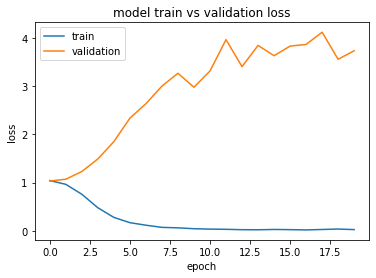

In [0]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

In [0]:
from sklearn.metrics import f1_score
f1_score(y_test,to_categorical(y_pred), average='weighted')


0.39155903237039996

In [0]:
yt=[]
for i in range(len(y_test)):
  if(int((y_test[i])[0])==1 and int((y_test[i])[1])==0 and int((y_test[i])[2])==0):
    yt.append(0)
  if(int((y_test[i])[0])==0 and int((y_test[i])[1])==1 and int((y_test[i])[2])==0):
    yt.append(1)
  if(int((y_test[i])[0])==0 and int((y_test[i])[1])==0 and int((y_test[i])[2])==1):
    yt.append(2)


In [0]:
from sklearn.metrics import confusion_matrix
# print(reverse_catagorial(y_test))

print(confusion_matrix(yt,y_pred))

[[ 63 150  52]
 [125 329  91]
 [ 59 155  41]]


In [0]:

# for i in range(10):
# print(to_categorical(y_pred))

In [0]:
from collections import Counter
 
print(Counter(y_pred))

Counter({1: 634, 0: 247, 2: 184})


In [0]:
y_pred=(model.predict_classes(X_unknown))

In [0]:
print(Counter(y_pred))

Counter({1: 833, 0: 322, 2: 232})


In [0]:
print('id','sentiment_class')
for i in range(len(y_pred)):
  print(tdf['id'][i],int(y_pred[i])-1)

id sentiment_class
1.24662826558803e+18 0
1.2458984966345e+18 0
1.24471702970725e+18 1
1.24572954337939e+18 0
1.2446364991335e+18 0
1.24404821748401e+18 0
1.24391941485832e+18 -1
1.24624507009909e+18 1
1.24613942162101e+18 -1
1.24425473344071e+18 1
1.24423312535969e+18 0
1.24424915548612e+18 0
1.2453849846906e+18 0
1.24541039325571e+18 0
1.24508270823085e+18 1
1.24611399659338e+18 1
1.24464221195171e+18 0
1.24588070059263e+18 0
1.24614303479173e+18 0
1.24461437661265e+18 0
1.24567101138896e+18 0
1.24466423824276e+18 0
1.24392227379239e+18 0
1.24436091386982e+18 0
1.24645851811222e+18 0
1.2442556070431e+18 -1
1.24395274359883e+18 0
1.24580319832727e+18 -1
1.2450578087955e+18 0
1.24584665451674e+18 0
1.2457011452696e+18 -1
1.24445054073984e+18 0
1.24565420007732e+18 0
1.24465196968545e+18 0
1.24616296765532e+18 0
1.24391576999546e+18 1
1.24467078967421e+18 -1
1.24408950323461e+18 1
1.24582705275156e+18 0
1.24567395564358e+18 -1
1.24668752307989e+18 0
1.24599764090459e+18 0
1.244475689341